# LinearRegression
---

**算法名称：LinearRegression** - LinearRegression For Classifier 


**1. 类别**
    
    LinearRegression 属于监督学习算法的一种，即可用于分类 Classifier 也可以用于回归 Regressor。在本章，主要阐述一下sklearn中用于分类（Classifier）的算法

    - LinearSVC
    - LogisitcRegression 

**2. 数学原理及证明**

    对于线性回归分类，通常和线形回归一样，先使用如下线性多项式建立模型，然后使用y值进行预测分分类。在binary classification中，通常y>0可以认为是class 0; y<0是属于class 1。 具体算法可参考 Linear Regression - linear regression regressor

                                y = w[0]*x[0] + w[1]*x[1] + .... + w[n]*x[n] + b > 0 
              
    x[0]...x[n]是模型的特征，w[0]...w[n]是模型的权重, b是初始参数。建立模型就是通过计算x[n]找到最合适的w[n]和b，计算y值。 
              

**3. 算法实现 scikit-learn**

```
sklearn.linear_model.LogisticRegression(penalty=’l2’, 
                                        dual=False, 
                                        tol=0.0001, 
                                        C=1.0, 
                                        fit_intercept=True, 
                                        intercept_scaling=1, 
                                        class_weight=None, 
                                        random_state=None, 
                                        solver=’warn’, 
                                        max_iter=100, 
                                        multi_class=’warn’, 
                                        verbose=0, 
                                        warm_start=False, 
                                        n_jobs=None)
                     
algorithm: 计算查找最邻近邻居的算法 {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’} 
    1. brute 既然要找到k个最近的邻居来做预测，那么只需要计算预测样本和所有训练集中的样本的距离，然后计算出最小的k个距离即可，接着多数表决，很容易做出预测。这个方法的确简单直接，在样本量少，样本特征少的时候有效。比较适合于少量样本的简单模型的时候用。
    2. kd_tree kd(k-dimension tree)树算法没有一开始就计算测试样本和所有训练样本的距离，而是先用kd树存储训练数据集，建好了kd树模型后再对测试集做预测，可以减少计算距离的次数。所谓的kd树就是k个特征维度的树，注意这里的k和kNN中的k的意思不同。kNN中的k代表k个邻近样本，kd树中的k代表样本特征的维数。KD树建树采用的是从m个样本的n维特征中，分别计算n个特征的取值的方差（数据方差大表明沿该坐标轴方向的数据分散的比较开，在这个方向上进行数据分割有较好的分辨率），用方差最大的k维特征nk来作为根节点。选择特征nk取值的中位数nkv对应的样本作为划分点，对于所有的第k维特征的取值小于nkv的样本，划入左子树；对于第k维特征的取值大于或等于nkv的样本，划为右子树，采用和刚才同样的办法找方差最大的特征来做子节点，递归的生成KD树。
    关于kd树更多知识见 http://blog.csdn.net/likika2012/article/details/39619687
    3. ball_tree 先构造一个超球体，此超球体是可以包含所有样本的最小球体；从球中选择一个离球的中心点最远的点，然后选择第二个点离第一个点最远，将球中所有的点分配到离这两个聚类中心最近的一个上，然后计算每个聚类的中心，以及聚类能够包含它所有数据点所需的最小半径。这样得到了两个子超球体，和KD树里面的左右字数对应。对于这两个超球体，递归执行上一步骤，最终得到一个球树。
           
leaf_size: 使用ball_tree/kd_tree时的参数，影响建立树的建立及查询速度和使用的内存。

metric:    模型的距离矩阵。

metric_params:

n_jobs=1:  查找邻居时使用的平行作业数量

n_neighbors: 参考邻近邻居的数量

p: 计算距离时,使用的指数。

weights: 缺省是uniform权重，即所有的权重都一样，邻近的邻居节点在投票是一样重要。在某些情况下，最好对邻点加权重，使较近的点在投票中更加重要。这时可以通过设置 weight =’distance’，分配与查询点距离的倒数成反比的权重。或者，可以自定义权重。

----------------------
Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
```

**4. 算法关键参数及特点**
   - Linear SVC and LogisitcRegression (Using L2 Regularization) 
   
        Parameter C controls regularization. Stronger regularization pushes coefficients more and more toward zero. 
      > C = 1 #default, **Use All Features, Decreasing C will cause Model More Generalization** 
    
          >> underfitting < use all features < coefficients move more toward 0 < C lower 

          >> overfitting  < use all features < coefficients move less toward 0 < C higher
          
| C | train score | test score | features used |
| --- | --- | --- | --- |
| 0.01 | 0.934 | __0.930__ | 30 |
| 1 | 0.958 | __0.953__ | 30 |
| 100 | 0.972 | __0.965__ | 30 |


---
# LinearRegression Classifier
---
## LinearRegression show on forge data set

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3


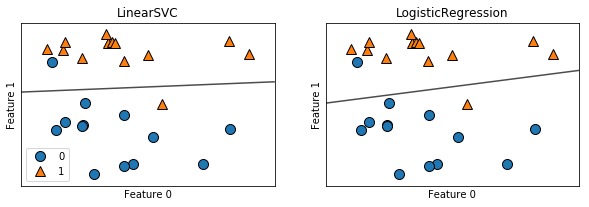

In [39]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import warnings
warnings.filterwarnings("ignore")

import mglearn
import matplotlib.pyplot as plt

#########
#  For regression classifier, the general prediction formula for a linear model looks as follows:
#
#      y = w[0]*x[0] + w[1]*x[1] + .... + w[n]*x[n] + b >0 
#
#   if y<0 
#      predict class-1
#   else
#      predict class+1
#
#  features: x[0]...x[n] 
#  coefficients: variable[coef_]       -->  slopes: weights  w[0]...w[n]
#  intercept:    variable[intercept_]  -->  b
#
#########

# Decision Boundaries for both linear SVM and LogisticRegression with default settings on forge data set. 
# all of them use "L2 Regularization"

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

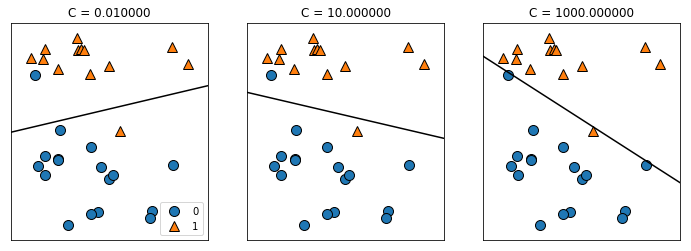

In [40]:
# Decision Boundaries of a linear SVM on forge data set. 
mglearn.plots.plot_linear_svc_regularization()
plt.show()

---
## 1. LogisticRegression Classifier
LogisticRegression also uses "L2 Regularization".  The parameter "C" is the key. Decreasing C push coefficients to move more toward zero.

> underfitting < use all features < more coefficients = 0 < C lower 

> overfitting  < use all features < less coefficients = 0 < C higher  
---
### LogisticRegression on the breast cancer data set 

In [41]:
# Decision Boundaries of a linear SVM on forge data set. 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Use default C=1
logreg = LogisticRegression().fit(X_train, y_train)
print("---------- Training Set -----------")
print(X_train.shape)
print("30 features in total in Training Set")
print("-----------------------------------")

print(logreg)
print("----------Using Parameter C with default 1 ------------")
print("Traning set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print("The number of features used: {}".format(np.sum(logreg.coef_ !=0)))

---------- Training Set -----------
(426, 30)
30 features in total in Training Set
-----------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
----------Using Parameter C with default 1 ------------
Traning set score: 0.953
Test set score: 0.958
The number of features used: 30


In [42]:
# Use C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("----------Using Parameter C=100 ------------")
print("Tranin set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
print("The number of features used: {}".format(np.sum(logreg.coef_ !=0)))

----------Using Parameter C=100 ------------
Tranin set score: 0.972
Test set score: 0.965
The number of features used: 30


In [43]:
# Use C=0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("----------Using Parameter C=0.01 ------------")
print("Tranin set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))
print("The number of features used: {}".format(np.sum(logreg.coef_ !=0)))

----------Using Parameter C=0.01 ------------
Tranin set score: 0.934
Test set score: 0.930
The number of features used: 30


Coefficients will move to zero with the decreasing of parameter C


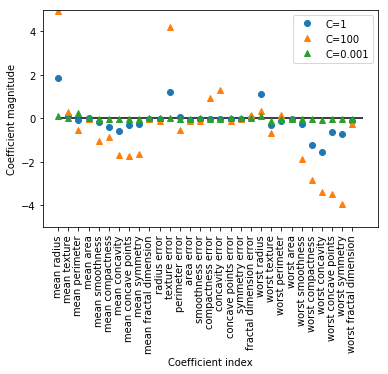

In [44]:
# Coefficients learned by logistic regression on the Breast Cancer dataset for different values of C
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, '^', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
print("Coefficients will move to zero with the decreasing of parameter C")
plt.show()


---
### LogisticRegression with L1 penalty on the breast cancer data set 

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


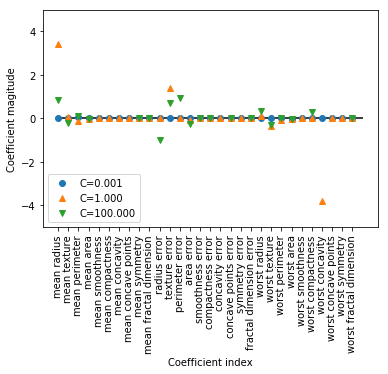

In [45]:
# Coefficients learned by logistic regression with L1 penalty on the Breast Cancer dataset for different values of C
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()


## 2. Linear SVC

### Multi-classifier issue. 
By using one-vs.-rest approach, we can extend a binary classification algorithem to a multiclass classification. To make a predication, all binary classifier are run on a test point. The classifier that has the highest score on its single calss will win. 

### Linear SVC on the blob data set 

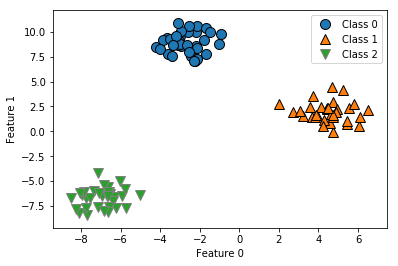

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [47]:
linear_svc = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svc.coef_.shape)
print("Intercept shape: ", linear_svc.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


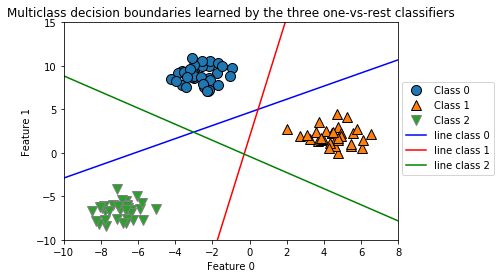

In [48]:
# Multiclass decision boundaries learned by the three one-vs-rest classifiers
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))
plt.title('Multiclass decision boundaries learned by the three one-vs-rest classifiers')
plt.show()

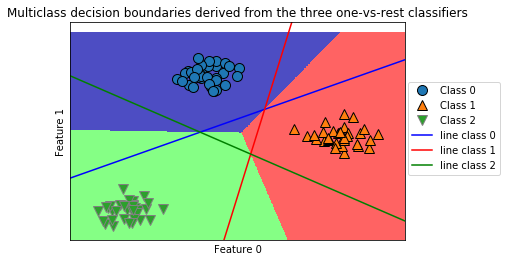

In [49]:
# Multiclass decision boundaries derived from the three one-vs-rest classifiers
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))
plt.title('Multiclass decision boundaries derived from the three one-vs-rest classifiers')
plt.show()